In [1]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from pandas import DataFrame

import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean
import statistics
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def dbscan(df, eps, minPoints):
    df_values = df[['value']]
    
    outliersIndexes = []
    clustersAndValues = {}
    clusterIndex = 0
    
    lastValue = df_values.iloc[0].value
    lastIndexSaved = 0
    
    for index, row in df_values.iterrows():
        currentValue = row.value
        differenceValue = abs(currentValue - lastValue)
     
        if(differenceValue > eps):
            clusterIndex+=1
      
        if clusterIndex not in clustersAndValues:
            clustersAndValues.setdefault(clusterIndex, [])
            clustersAndValues[clusterIndex].append(currentValue)
        else:
            clustersAndValues[clusterIndex].append(currentValue)
        
        if len(clustersAndValues.get(clusterIndex, 0)) <= minPoints:
            outliersIndexes.append(index)
            lastIndexSaved = index
        
        if len(clustersAndValues.get(clusterIndex, 0)) > minPoints and lastIndexSaved in outliersIndexes:
            outliersIndexes.remove(lastIndexSaved)

        lastValue = currentValue

    return clustersAndValues, outliersIndexes

def compute_distances(values):
    distances = []
    
    for index, value in enumerate(values):
        if(index < len(values) - 1):
            distance = abs(value - values[index + 1]) 
            distances.append(distance)
       
    return distances

def compute_dispersion(values, mean):
    sum = 0
    for value in values:
        subtractionResult = value - mean
        squareResult = subtractionResult ** 2
        sum += squareResult
    totalNumbers = 1 if len(values) == 0 else len(values)    
    divideResult = sum / totalNumbers
    return math.sqrt(divideResult)

def split_anomalies_and_non_anomalies(df):
    anomalies = []
    nonAnomalies = []
    
    for index, row in df.iterrows():
        checkForAnomalyResult = check_for_anomaly(index, df)
        if(0 == checkForAnomalyResult):
            nonAnomalies.append(row['value'])
        elif(1 == checkForAnomalyResult):
            anomalies.append(row['value'])              
        else:
            continue
  
    return anomalies, nonAnomalies

def check_for_anomaly(index, df):
    currentRow = df.iloc[index]
    
    if(index >= len(df) - 1):
        if (1 == currentRow['anomaly']):
            return 1
        else: 
            return 0
        
    nextRow = df.iloc[index + 1]
    if(0 == currentRow['anomaly'] and 0 == nextRow['anomaly']):
        return 0
    elif(1 == currentRow['anomaly'] and 1 == nextRow['anomaly']):
        return 2
    else:
        return 1

def show_results_graph(clustersAndValues, outliersIndexes):
    fig = plt.figure()
    ax = fig.add_axes([.4,.4, 4, 4])
    colors = ['red', 'lime', 'purple', 'mediumblue', 'gold', 'darkred', 'aqua', 'yellowgreen', 'cyan', 'fuchsia', 'darkviolet', 'teal', 'lightcoral', 'skyblue', 'royalblue', 'olive']
    index = 0

    for clusterIndex, clusterValues in clustersAndValues.items():
        for value in clusterValues:
            if index in outliersIndexes:
                plt.scatter(index, value, label='skitscat', color='red', s=400, marker="X")
                label = (index, " - ", value)
                plt.annotate(label, (index, value))
            elif index == 942:
                plt.scatter(index, value, label='skitscat', color='yellow', s=600, marker="X")
                label = ("ANOMALY NOT DETECTED")
                plt.annotate(label, (index, value))
            else:
                color = colors[(clusterIndex + 1) % len(colors)]
                plt.scatter(index, value, label='skitscat', color=color, s=100, marker="o")

            index +=1
        
    ax.set_xlabel('index')
    ax.set_ylabel('values')
    plt.title('DBScan')
    plt.show()    
    
def search_anomalies(df):
    halfIndex = int((len(df)/2))
    anomalies, nonAnomalies = split_anomalies_and_non_anomalies(df[:halfIndex])

    anomalyDistances = compute_distances(anomalies)
    nonAnomalyDistances = compute_distances(nonAnomalies)
   
    maxAnomalyDistances = max(anomalyDistances) if len(anomalyDistances) > 0 else 1
    mean = statistics.median([maxAnomalyDistances, min(nonAnomalyDistances)])
    
    anomaliesDispersion = compute_dispersion(anomalyDistances, mean)
    nonAnomaliesDispersion = compute_dispersion(nonAnomalyDistances, mean)  

    clustersAndValues, outliersIndexes = dbscan(df, mean, 1)

    show_results_graph(clustersAndValues, outliersIndexes)
  
    print("Founded {", len(outliersIndexes), "} outliers, with indexes: ", outliersIndexes)


In [ ]:
# ==========================    
# ====== read dframes ======
# ==========================   

In [ ]:
df_TS1 = pd.read_csv("data_sets/A3Benchmark-TS1.csv", sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
search_anomalies(df_TS1)
print(df_TS1[df_TS1['anomaly'] == 1])

#     print("Anomalies distances: ", anomalyDistances)
#     print("mean ", mean)
#     print("not founded one is 942, which has diference lower that training data")
#     print(abs(df.iloc[942]['value'] - df.iloc[943]['value']))
#     print("difference between index 942 and 941 is")
#     print(abs(df.iloc[942]['value'] - df.iloc[941]['value']))
    
#     print("max anomalyDistances", max(anomalyDistances))
#     print("min anomalyDistances", min(anomalyDistances))
        
#     print("min nonAnomalyDistances", min(nonAnomalyDistances))
#     print("max nonAnomalyDistances", max(nonAnomalyDistances))
    
#     print("mean ", mean)



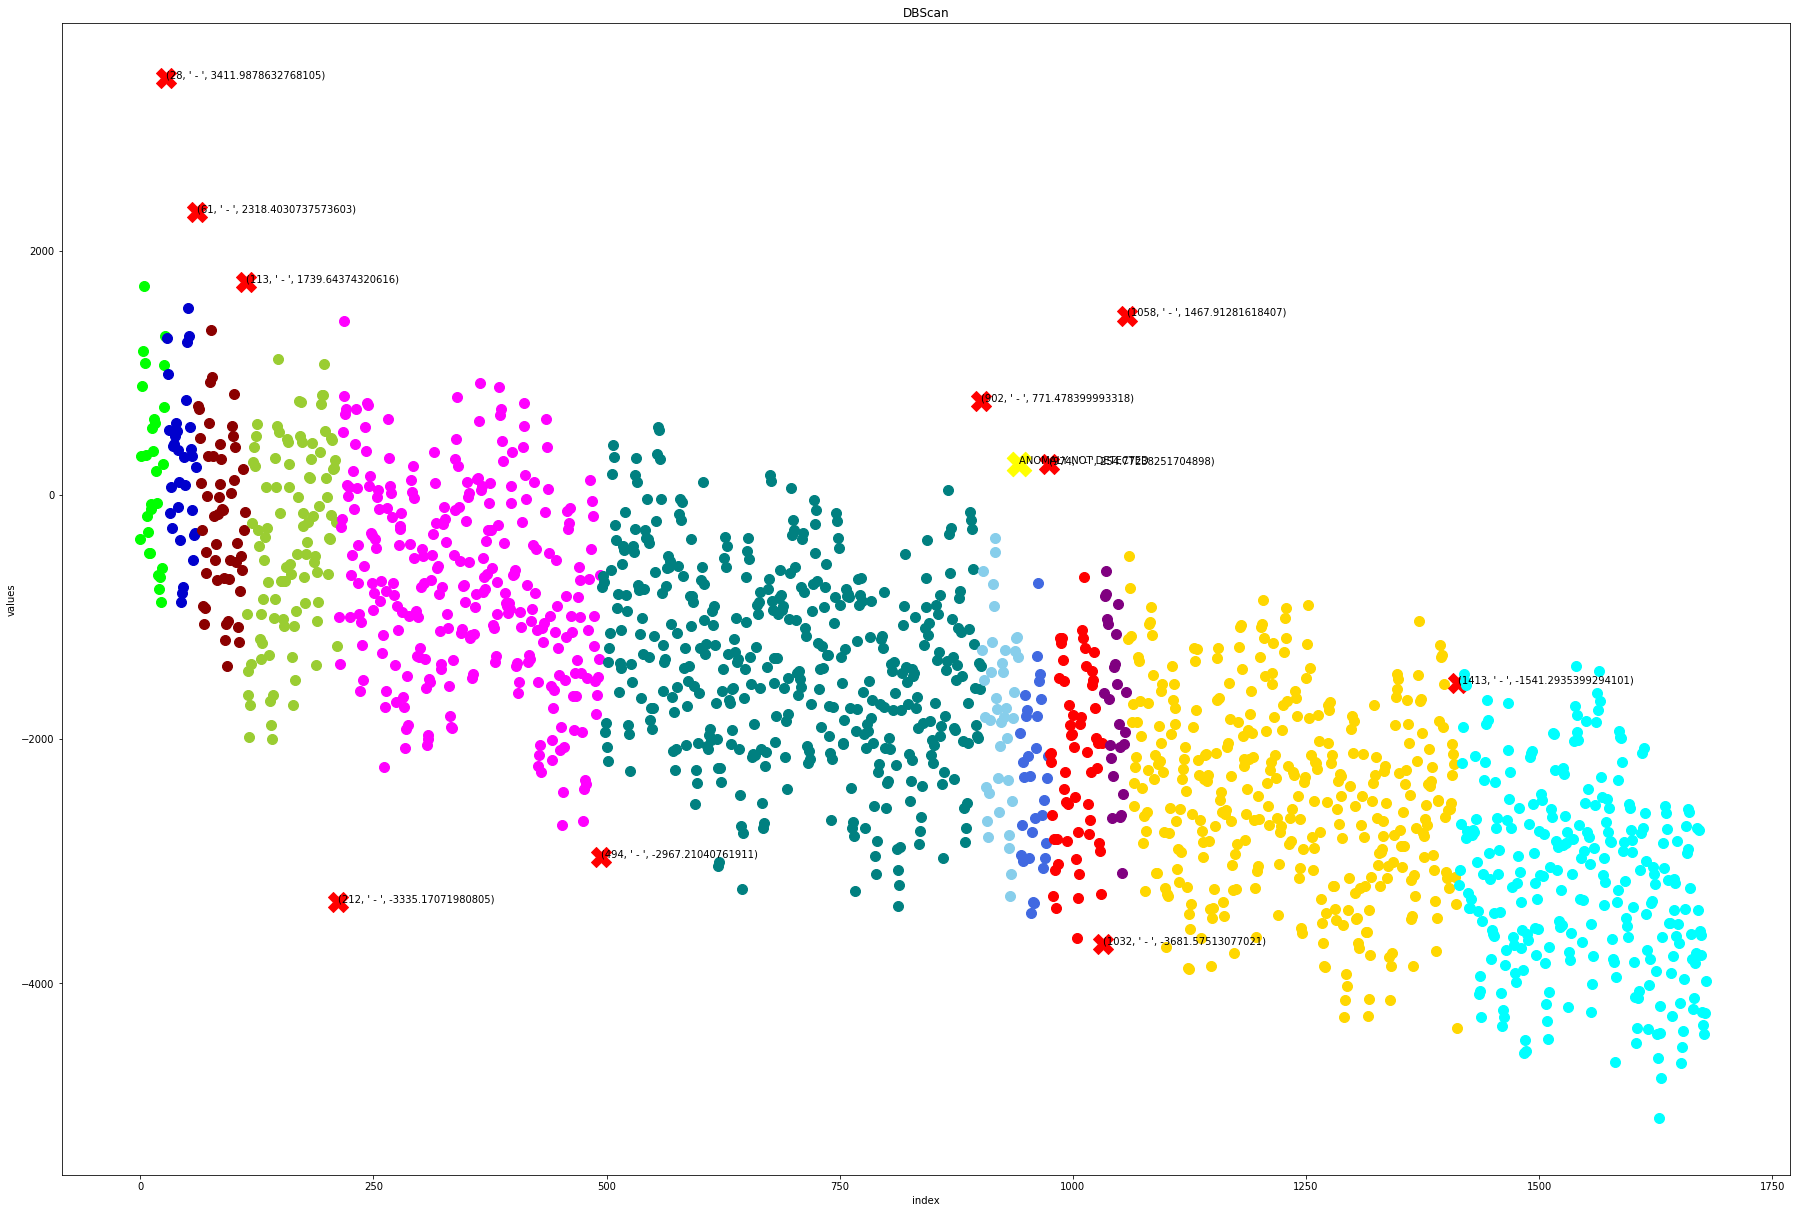

Founded { 10 } outliers, with indexes:  [28, 61, 113, 212, 494, 902, 974, 1032, 1058, 1413]
        timestamps        value  anomaly  changepoint  trend       noise  \
28    1.416823e+09  3411.987863        1            0    -58 -152.368844   
61    1.416942e+09  2318.403074        1            0   -124 -334.334218   
113   1.417129e+09  1739.643743        1            0   -228  116.081217   
212   1.417486e+09 -3335.170720        1            0   -426   22.300600   
494   1.418501e+09 -2967.210408        1            0   -990 -135.251008   
902   1.419970e+09   771.478400        1            0  -1806 -384.548559   
942   1.420114e+09   254.958719        1            0  -1886 -273.502398   
974   1.420229e+09   254.772383        1            0  -1950 -131.112546   
1032  1.420438e+09 -3681.575131        1            0  -2066  292.872892   
1058  1.420531e+09  1467.912816        1            0  -2118   94.075095   
1413  1.421809e+09 -1541.293540        1            0  -2828   33.566693

In [16]:
df_TS2 = pd.read_csv("data_sets/A3Benchmark-TS2.csv", sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
search_anomalies(df_TS2)
print(df_TS2[df_TS2['anomaly'] == 1])

In [ ]:
df_TS3 = pd.read_csv("data_sets/A3Benchmark-TS3.csv", sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
search_anomalies(df_TS3)s
print(df_TS3[df_TS3['anomaly'] == 1])

In [ ]:
df_TS4 = pd.read_csv("data_sets/A3Benchmark-TS4.csv", sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
search_anomalies(df_TS4)
print(df_TS4[df_TS4['anomaly'] == 1])

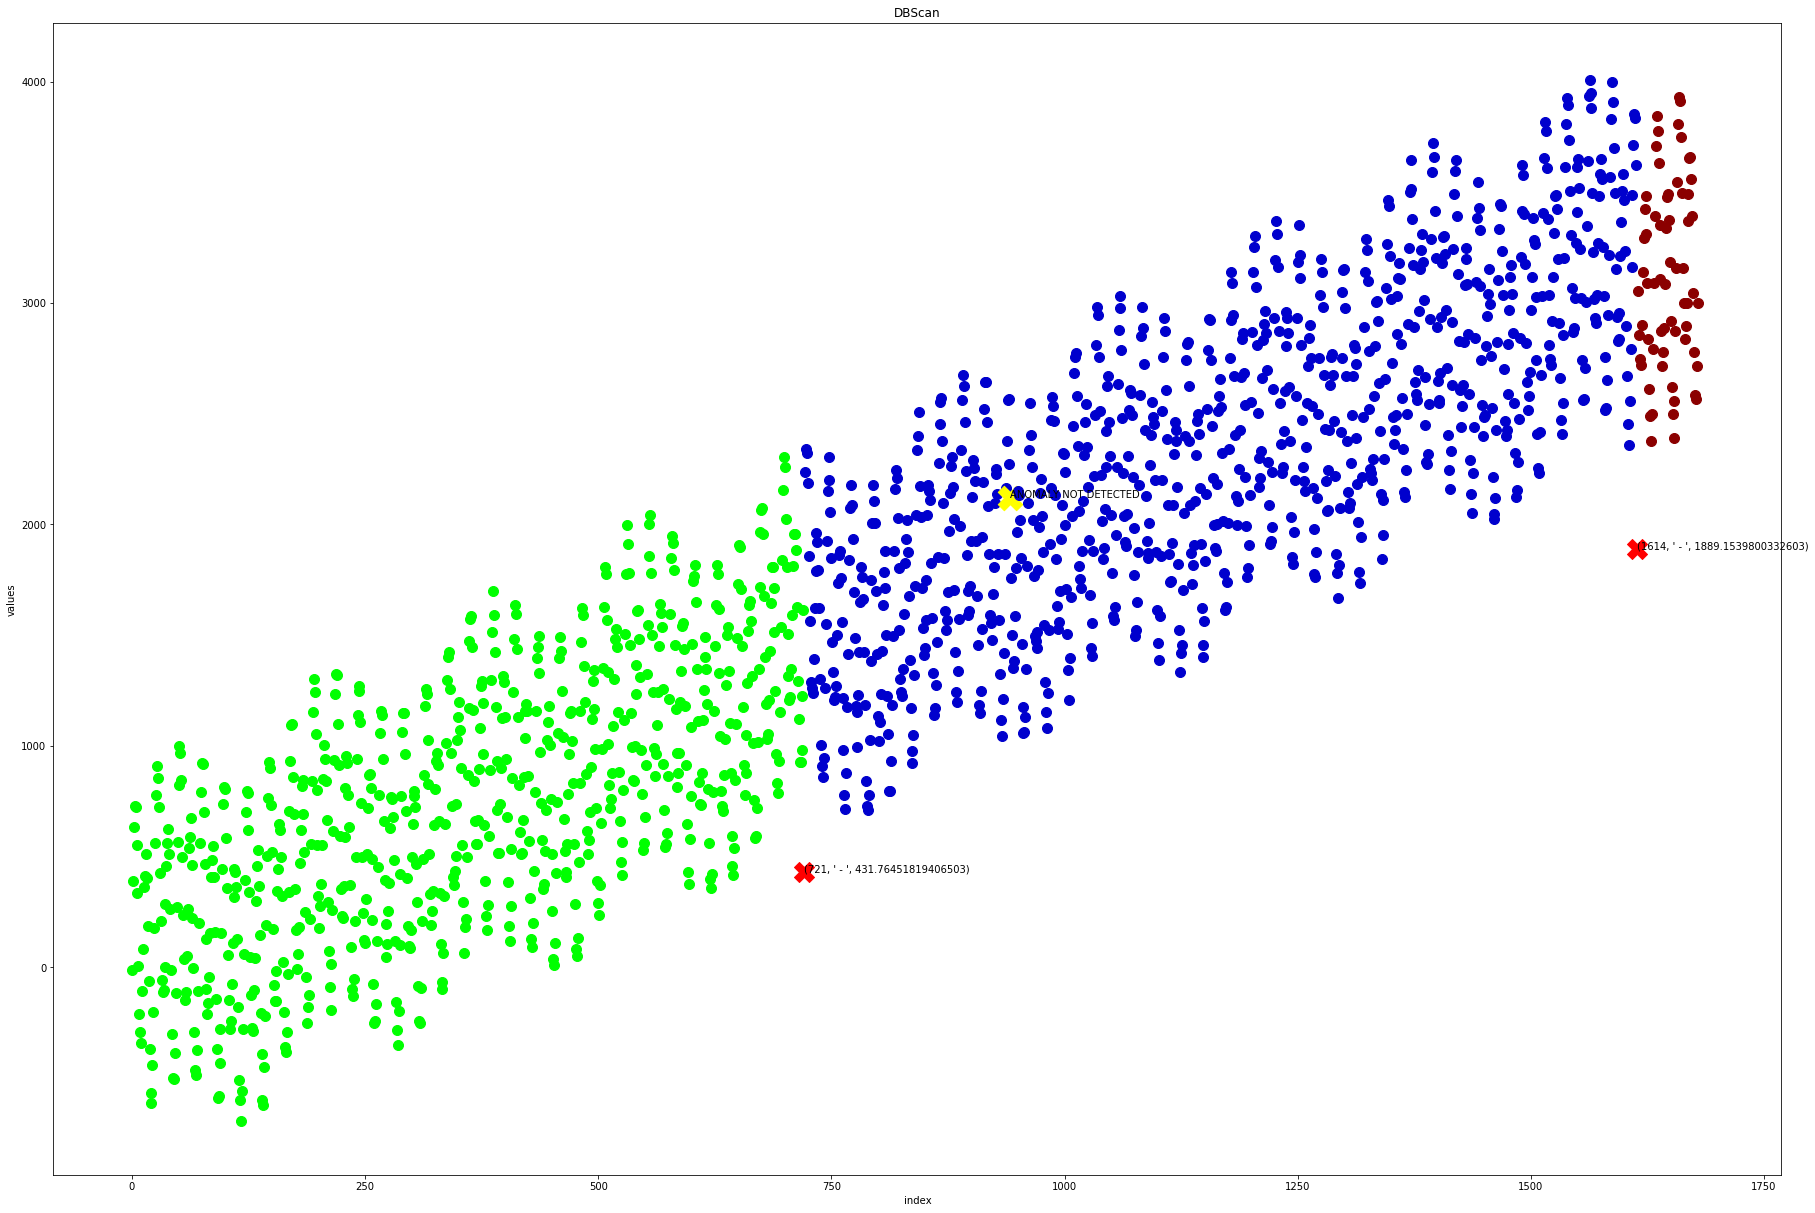

Founded { 2 } outliers, with indexes:  [721, 1614]
        timestamps        value  anomaly  changepoint  trend      noise  \
721   1.419318e+09   431.764518        1            0   1444  -1.163552   
1614  1.422533e+09  1889.153980        1            0   3230  24.112466   

      seasonality1  seasonality2  seasonality3  
721   2.772000e+02     66.464731    162.275539  
1614 -3.097701e-11    256.800000   -104.746287  


In [3]:
df_TS5 = pd.read_csv("data_sets/A3Benchmark-TS5.csv", sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
search_anomalies(df_TS5)
print(df_TS5[df_TS5['anomaly'] == 1])